10000
(18176,)


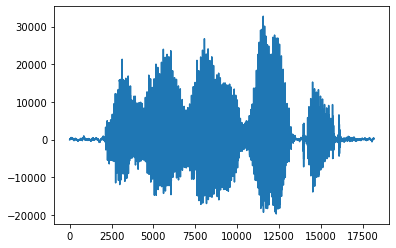

In [1]:
import numpy as np
from scipy.io import wavfile
from matplotlib import pyplot as plt
import math
import statsmodels.api as sm
import scipy
import soundpy as sp

fs, wav = wavfile.read('speech.wav')
print(fs)
print(wav.shape)
plt.plot(wav)

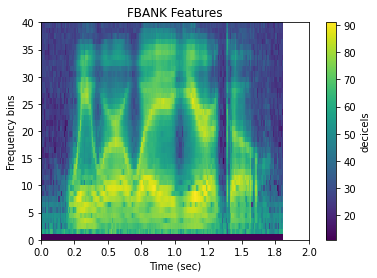

In [2]:
l1 = sp.plotsound(wav, sr = fs)
plt.show()

(18100,)


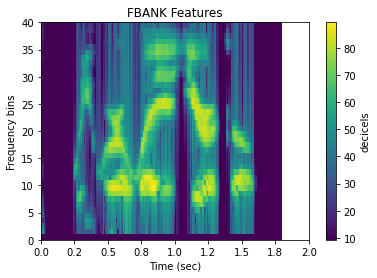

In [5]:
wav = wav.astype('float64')
filter_scale = 6
filtered_wav, fs = sp.filtersignal(wav,
                                 sr = fs,
                                 filter_type = 'wiener',
                                  filter_scale = filter_scale,
                                  duration_noise_ms = 500)
print(filtered_wav.shape)

l1 = sp.plotsound(filtered_wav, sr = fs)
plt.show()

[[ 1.71309277e+10  1.58151634e+10  1.24023178e+10  8.08819798e+09
   4.02832156e+09  8.79731875e+08 -1.40838543e+09 -3.28729609e+09
  -5.07540459e+09 -6.80082516e+09 -8.30304379e+09 -9.36487602e+09
  -9.87108854e+09 -9.79136242e+09 -9.00051932e+09]
 [ 1.58151634e+10  1.71368517e+10  1.58130913e+10  1.23943138e+10
   8.07759307e+09  4.01767649e+09  8.71362489e+08 -1.41461402e+09
  -3.29272614e+09 -5.07994078e+09 -6.80433897e+09 -8.30485179e+09
  -9.36444019e+09 -9.86793728e+09 -9.78485179e+09]
 [ 1.24023178e+10  1.58130913e+10  1.71001448e+10  1.57517265e+10
   1.23287277e+10  8.02436127e+09  3.98308179e+09  8.49635369e+08
  -1.43590342e+09 -3.32195132e+09 -5.11298555e+09 -6.82977993e+09
  -8.31371814e+09 -9.34880850e+09 -9.83014971e+09]
 [ 8.08819798e+09  1.23943138e+10  1.57517265e+10  1.70009703e+10
   1.56472706e+10  1.22454793e+10  7.97134982e+09  3.95051872e+09
   8.17222505e+08 -1.48259135e+09 -3.37595504e+09 -5.15523699e+09
  -6.84530594e+09 -8.28929099e+09 -9.28892702e+09]
 [ 4

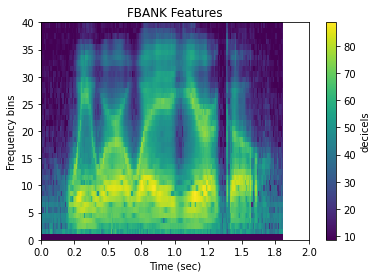

In [44]:
filter_order = 15 # 6, 15
window_size = 500 # 200, 500
start = 5000

window_filter_x = np.array([wav[filter_order-i:wav.shape[0]-i] for i in range(1, filter_order+1)])
window_filter_y = wav[filter_order:]

R = np.zeros((filter_order, filter_order))
for i in range (R.shape[0]):
    for j in range (R.shape[1]):
        R[i, j] = np.dot(window_filter_x[i][start:start+window_size], window_filter_x[j][start:start+window_size])
print(R)

P = np.zeros((filter_order))
for i in range (window_filter_x.shape[0]):
    P[i] = np.dot(window_filter_x[i][start:start+window_size], window_filter_y[start:start+window_size])
print(P)

hopt = np.matmul(np.linalg.inv(R), P)
print(hopt)

y_hat = np.matmul(hopt, window_filter_x)

l1 = sp.plotsound(y, sr = fs)
plt.show()

500
[0.01169674 0.0115896  0.01144016 0.0112705  0.0110581  0.01082375
 0.01056304 0.0102946  0.01000002 0.00972138 0.0094169  0.009123
 0.00883079 0.00855461 0.00827834]


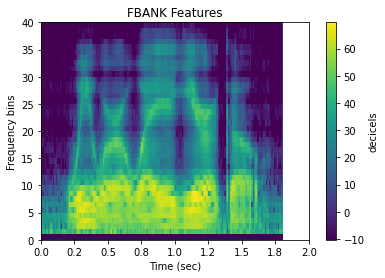

In [47]:
# LMS Algorithm

import padasip as pa

filter_order = 15 # 6, 15
window_size = 500 # 200, 500

window_filter_x = np.array([wav[filter_order-i:wav.shape[0]-i] for i in range(1, filter_order+1)])
window_filter_y = wav[filter_order:]
'''
f = pa.filters.FilterNLMS(n = filter_order, mu = 0.00011, w = "random")
y, e, w = f.run(window_filter_y, window_filter_x.T)

'''
weight_filter = np.zeros((filter_order))

weight_error = 10000
weight_threshold = 0.00000001

mu = 0.0000000005

n = 0
start = 1

while (n <= window_size-1):
    e_n = window_filter_y[n+start] - np.dot(weight_filter, window_filter_x[:, n+start])
    weight_filter_new = weight_filter + mu * window_filter_x[:, n+start] * e_n
    weight_filter = weight_filter_new
    #print(weight_filter)
    n = n + 1

w_optimal = weight_filter
print(n)
print(w_optimal)

y = np.matmul(w_optimal, window_filter_x)

l1 = sp.plotsound(y, sr = fs)
plt.show()

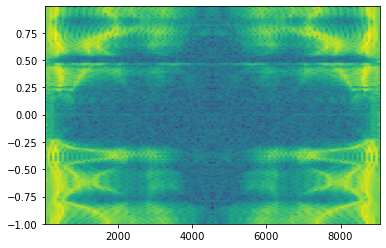

In [33]:
fy = scipy.fft.fft(wav)
l1 = plt.specgram(fy)
plt.show()

In [12]:
# Wiener Filter
from scipy.linalg import toeplitz
import scipy
from scipy.ndimage.interpolation import shift
# filter_input_x, filter_output_y


filter_order = 6 # 6, 15
window_size = 100 # 200, 500
# window_start = np.random.randint(50, 9000)
# window_filter_x = filter_input_x[window_start:window_start+window_size]
# window_filter_y = filter_output_noise_y[window_start:window_start+window_size]

for i in range (len(wav)-window_size):
    window_filter_x = np.array([wav[start_point+filter_order-i:start_point+window_size+filter_order-i] for i in range (1, filter_order+1)])
    window_filter_y = wav[start_point+filter_order:start_point+window_size+filter_order]

# ACF
R = np.zeros((filter_order, filter_order))
for i in range (R.shape[0]):
    for j in range (R.shape[1]):
        R[i, j] = np.dot(window_filter_x[i], window_filter_x[j])
print(R)

[[ 30858.  -7041.  20324. -20842. -24129.  15963.]
 [ -7041.  31819.  -7041.  20448. -20842. -24129.]
 [ 20324.  -7041.  31819.  -7041.  20448. -20842.]
 [-20842.  20448.  -7041.  31835.  -7041.  20448.]
 [-24129. -20842.  20448.  -7041.  31835.  -7041.]
 [ 15963. -24129. -20842.  20448.  -7041.  31810.]]


In [13]:
# Cross-correlation
from scipy.ndimage.interpolation import shift

P = np.zeros((filter_order))
for i in range (window_filter_x.shape[0]):
    P[i] = np.dot(window_filter_x[i], window_filter_y)
print(P)

[ -9366.  20324. -21142. -24129.  15963.  -8963.]


In [14]:
hopt = np.matmul(np.linalg.inv(R), P)
hopt

array([-1.08722976, -1.46891536, -0.18582945, -0.09910938, -1.45922437,
       -1.23143281])

In [15]:
# Calculate Weight Accuracy
from sklearn.metrics import mean_squared_error

y_hat =  np.array([np.dot(hopt, window_filter_x[:, i]) for i in range (window_filter_x.shape[1])])
print(y_hat)
# WSNR
y_error = mean_squared_error(window_filter_y, y_hat)
y_error

[-127.47504585 -193.52342695 -224.34503161 -366.15423816 -531.24612219
 -502.31895456 -526.55989443 -718.23818615 -731.07984117 -553.18330647
 -534.92792478 -608.35823527 -488.04818507 -300.50039784 -229.1710305
 -215.77929458 -125.37156332   -2.66204957   54.88193148   35.3672781
   23.93395266  112.86295737  185.27247011  136.66361599  151.59605431
  234.0108864   223.23387087  212.49083705  293.61919549  266.99260219
  230.84177512  266.96575596  212.97029477  182.24641897  211.32224964
  139.77261017   46.53159106   74.83960536   65.39194323    9.89773416
    7.54469539   20.42914121   17.24005937    0.            0.
    0.           -8.69783808  -11.75132291   -1.4866356    -9.49071313
  -27.77403693  -17.21375955  -20.01909877  -89.2288222  -166.54871111
 -206.80177602 -237.46449769 -342.20466302 -531.06729441 -637.65064577
 -606.05202306 -667.35248054 -815.15383167 -828.53160898 -779.80062665
 -815.73553834 -851.2647991  -814.36350122 -790.14059386 -782.34207277
 -805.2508369  -

353657.5271674954

In [16]:
# LMS Algorithm

# filter_input_x, filter_output_y

# initialization and searching techniques
import padasip as pa

weight_filter = np.zeros((filter_order))

weight_error = 10000
weight_threshold = 0.00000001

mu = 0.0000005

n = 0

'''
while (n <= window_filter_y.shape[0]-1):
    e_n = window_filter_y[n] - np.dot(weight_filter, window_filter_x[:, n])
    weight_filter_new = weight_filter + mu * window_filter_x[:, n] * e_n
    # weight_error = np.sum((weight_filter_new - weight_filter) ** 2)/len(weight_filter)
    weight_filter = weight_filter_new
    n = n + 1
'''

w_optimal = weight_filter
print(n)
print(w_optimal)

y_hat =  np.array([np.dot(w_optimal, window_filter_x[:, i]) for i in range (window_filter_x.shape[1])])
# WSNR
y_error = mean_squared_error(window_filter_y, y_hat)
y_error

100
[0.1993667  0.16934966 0.14280665 0.10859773 0.06934004 0.03685988]


2105.965848211048